In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
scoutcar = pd.read_json("scout_car/scout_car.json",lines=True)
df = scoutcar.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [3]:
df.sample(3)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
1205,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI Adrenalin 66 kW (90 CV,Sedans,15900,VAT deductible,"6,500 km",07/2018,None,NaN,66 kW,"[, Used, , Diesel]",NaN,NaN,NaN,\n60 months\n,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\n4800191\n],"[\n, 2018, \n]","[\n, White, \n]",[\nMetallic\n],[\nBlanco\n],NaN,"[\n, Sedans, \n]",[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,640 kg\n]",NaN,"[\n, Diesel, \n]","[[3.7 l/100 km (comb)], [3.9 l/100 km (city)],...",[\n98 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...",[Radio],[Alloy wheels],"[ABS, Central door lock, Daytime running light...","[\n, Equipamiento incluido, 1*PRECIO SUJETO A ...",NaN,[\n5\n],[\nSpain\n],NaN,NaN,NaN,NaN,NaN,NaN
7813,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,5trg 120 Jahre 1.4 Autom./Klima/Intelli,Sedans,23940,VAT deductible,12 km,04/2019,None,NaN,110 kW,"[, Pre-registered, , Super 95]",NaN,NaN,\nYes\n,"[\n, \n, \n134 g CO2/km (comb)\n]","[\n, \n, \nEuro 6d-TEMP\n]",NaN,[],\nOpel\n,"[\n, Astra, \n]",[\n00-11-95954\n],"[\n, 2019, \n]","[\n, Black, \n]",[\nMetallic\n],[\nONYX SCHWARZ (METALLIC)\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,398 cc\n]",[\n4\n],"[\n1,308 kg\n]",[\nfront\n],"[\n, Super 95, \n]","[[5.9 l/100 km (comb)], [7.4 l/100 km (city)],...",[\n134 g CO2/km (comb)\n],[\nEuro 6d-TEMP\n],"[Air conditioning, Armrest, Automatic climate ...","[On-board computer, Radio, USB]","[Alloy wheels, Catalytic Converter]","[ABS, Central door lock, Daytime running light...","[\nFahrzeug-Nr: 00-11-95954, , , Media, , R...",[\n4 (Green)\n],[\n6\n],[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN
4300,https://www.autoscout24.com//offers/audi-a3-1-...,Audi A3,1.6 TDI Sport- UFFICIALE AUDI -PRONTA CONSEGNA,Sedans,17990,None,"26,000 km",06/2017,1 previous owner,NaN,81 kW,"[, Used, , Diesel]",\n1\n,NaN,NaN,"[\n12 months\n, \n107 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n]",[],\nAudi\n,"[\n, A3, \n]",NaN,"[\n, 2017, \n]","[\n, White, \n]",NaN,NaN,"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n3\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,310 kg\n]",[\nfront\n],"[\n, Diesel, \n]","[[4 l/100 km (comb)], [4.7 l/100 km (city)], [...",[\n107 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Auxiliary heating,...","[Bluetooth, Hands-free equipment, MP3, On-boar...",[Alloy wheels],"[ABS, Alarm system, Central door lock, Central...","[\nPRONTA CONSEGNA, CHIAMARE O MANDARE EMAIL P...",NaN,[\n6\n],[\nItaly\n],NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('.','').str.replace('\n','').str.replace('_&','')
df.sample(3).T

<ipython-input-4-00e2184ea1be>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('.','').str.replace('\n','').str.replace('_&','')


,13632,14266,14593
url,https://www.autoscout24.com//offers/renault-cl...,https://www.autoscout24.com//offers/renault-cl...,https://www.autoscout24.com//offers/renault-cl...
make_model,Renault Clio,Renault Clio,Renault Clio
short_description,1.5 DCI 85 CV,1.2 75 CV 5 porte,"Sporter 1.5 dCi 90CV Zen , NAVI - AZIENDALE"
body_type,Station wagon,Sedans,Station wagon
price,7900,9990,10450
vat,None,VAT deductible,VAT deductible
km,"135,050 km","26,000 km","39,500 km"
registration,05/2016,06/2018,04/2018
prev_owner,None,None,None
kw,NaN,NaN,NaN


In [5]:
df.drop("url", axis=1, inplace=True)  # url is unique for each row. so it is like index column. we won't need it during machine learning process.

In [6]:
df.isnull().sum()/len(df)*100

make_model                         0.000000
short_description                  0.288963
body_type                          0.376908
price                              0.000000
vat                               28.349771
km                                 0.000000
registration                       0.000000
prev_owner                        42.892141
kw                               100.000000
hp                                 0.000000
type                               0.012564
previous_owners                   41.711163
next_inspection                   77.793831
inspection_new                    75.299956
warranty                          34.047365
full_service                      48.395000
non-smoking_vehicle               54.915510
null                               0.000000
make                               0.000000
model                              0.000000
offer_number                      19.944720
first_registration                10.032037
body_color                      

The columns with more than %90 persentage of null values won't be usefull for us. So we can drop them.

In [7]:
df.drop(["kw","electricity_consumption","last_service_date", "other_fuel_types" ,"availability" ,"last_timing_belt_service_date","available_from"], axis=1,inplace=True)

## make_model

In [8]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

## make

In [9]:
df["make"]=df["make"].str.strip("\n")
df["make"].sample()

703    Audi
Name: make, dtype: object

## model

In [10]:
df["model"]= df["model"].str[1]
df["model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

## short_description & description

We could need the data in this column to fill the columns with missing values. But it would be overwhelming and right now, not necessary.

In [11]:
df.drop(["short_description", "description"], axis=1, inplace=True)

## body_type & body

In [12]:
df[["body_type","body"]]

,body_type,body
0,Sedans,"[\n, Sedans, \n]"
1,Sedans,"[\n, Sedans, \n]"
2,Sedans,"[\n, Sedans, \n]"
3,Sedans,"[\n, Sedans, \n]"
4,Sedans,"[\n, Sedans, \n]"
...,...,...
15914,Van,"[\n, Van, \n]"
15915,Van,"[\n, Van, \n]"
15916,Van,"[\n, Van, \n]"
15917,Van,"[\n, Van, \n]"


In [13]:
df.drop("body", axis=1, inplace=True)

## price

Target column must not be manipulated. We can drop the rows with null values. Don't try to fill them!

C:\Users\gulbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


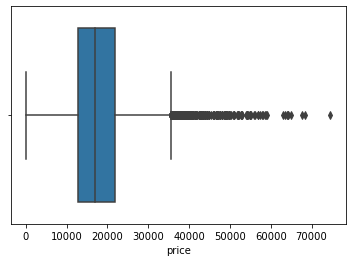

In [14]:
sns.boxplot(df.price);

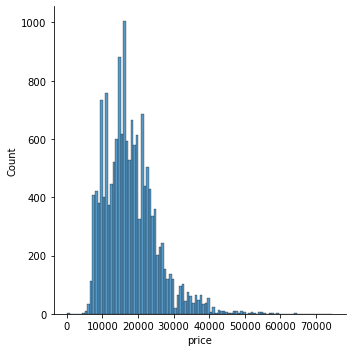

In [15]:
sns.displot(df.price);

## vat

value added tax

In [16]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [17]:
df.km.value_counts()

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
20,678 km       1
25,273 km       1
125 km          1
15,991 km       1
23,168 km       1
Name: km, Length: 6690, dtype: int64

We need float or integer to use in our machine learning process. 

In [18]:
df["km"] = df.km.str.replace(",","").str.replace(" km","").str.replace("-","NaN").astype("float")


## registration & first_registiration

In [19]:
df.registration.value_counts()

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
12/2019       1
11/2019       1
08/2019       1
Name: registration, dtype: int64

In [20]:
df["first_registration"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: first_registration, dtype: int64

In [21]:
df["age"]=2019 - df["first_registration"].str[1].astype("float")

In [22]:
df.age.value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

In [23]:
df.drop(["first_registration","registration"], axis=1, inplace=True)

## prev_owner & previous_owners

In [24]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [25]:
df["previous_owners"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                               8101
NaN                                 6640
\n2\n                                766
\n0\n                                163
\n3\n                                 17
                                    ... 
[\n1\n, \n137 g CO2/km (comb)\n]       1
[\n2\n, \n127 g CO2/km (comb)\n]       1
[\n1\n, \n159 g CO2/km (comb)\n]       1
[\n0\n, \n117 g CO2/km (comb)\n]       1
[\n1\n, \n102 g CO2/km (comb)\n]       1
Name: previous_owners, Length: 103, dtype: int64

In [26]:
df["previous_owners"] = [item[0] if type(item)== list else item for item in df["previous_owners"]]
# df["Previous Owners"] = df["Previous Owners"].apply(item[0] if type(item)== list else item)

In [27]:
df["previous_owners"].value_counts(dropna=False)

\n1\n    8294
NaN      6640
\n2\n     778
\n0\n     188
\n3\n      17
\n4\n       2
Name: previous_owners, dtype: int64

In [28]:
df["previous_owners"] = df["previous_owners"].str.strip("\n")
df["previous_owners"].value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [29]:
df.drop("prev_owner", axis=1, inplace=True)

## hp

In [30]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
52 kW       22
82 kW       22
1 kW        20
78 kW       20
146 kW      18
294 kW      18
141 kW      16
57 kW       10
120 kW       8
104 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
80 kW        3
168 kW       3
93 kW        3
98 kW        3
149 kW       3
167 kW       2
89 kW        2
228 kW       2
127 kW       2
86 kW        2
53 kW        2
143 kW       2
63 kW        2
270 kW       2
150 kW       2
140 kW    

In [31]:
df["hp_kW"] = df.hp.str.replace(" kW","").str.replace("-", "NaN").astype("float")
df.drop("hp",axis=1, inplace=True)

## full_service

In [32]:
df["full_service"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7 l/100 km (city), \n, 4.5 l/100 km (country), \n]         1
[\n, \n, \n, 4.7 l/100 km (comb), \n, 5.4 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \n164 g CO2/km (comb)\n]                                                                1
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \

In [33]:
df.drop("full_service",axis=1, inplace=True)

## non-smoking_vehicle

In [34]:
df["non-smoking_vehicle"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

the values don't match the column name. we can drop it.

In [35]:
df.drop("non-smoking_vehicle",axis=1, inplace=True)

### upholstery

In [36]:
df.upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nFull leather, Beige\n]      36
[\nVelour, Black\n]            36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nCloth, Whit

I don't think that the color of the upholstery affects the price. so we need only the type.

In [37]:
u_type = ["Cloth", "Velour", "Part leather", "Full leather", "alcantara"]
df["upholstery_type"] = df.upholstery.apply(lambda item : item[0] if type(item)== list and item[0].strip("\n") in u_type else np.nan)

In [38]:
df["upholstery_type"].value_counts()

\nCloth\n           1005
\nPart leather\n     140
\nFull leather\n     139
\nVelour\n            16
\nalcantara\n          2
Name: upholstery_type, dtype: int64

In [39]:
df["upholstery_type"] = df.upholstery_type.str.strip("\n")
df["upholstery_type"].value_counts(dropna=False)

NaN             14617
Cloth            1005
Part leather      140
Full leather      139
Velour             16
alcantara           2
Name: upholstery_type, dtype: int64

In [40]:
df.drop("upholstery", axis=1, inplace=True)

## next_inspection & inspection_new 

In [41]:
df["next_inspection"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n11/2020\n, \n119 g CO2/km (comb)\n]        1
[\n04/2021\n, \n153 g CO2/km (comb)\n]        1
[\n06/2020\n, \n114 g CO2/km (comb)\n]        1
[\n04/2019\n, \n110 g CO2/km (comb)\n]        1
[\n08/2020\n, \n143 g CO2/km (comb)\n]        1
Name: next_inspection, Length: 1400, dtype: int64

In [42]:
#df["Next Inspection"] = df["Next Inspection"].apply(lambda item : item[0] if type(item)== list else item)
#df["Next Inspection"] = df["Next Inspection"].apply(lambda item : item.strip("\n") if type(item)== str else item)
#df["Next Inspection"].value_counts(dropna=False)

I don't think that next inspection affect the price.

In [43]:
df.inspection_new.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
                                                                                              ... 
[\nYes\n, \n183 g CO2/km (comb)\n]                                                               1
[\nYes\n, \n, 4.9 l/100 km (comb), \n, 5.9 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, \n, 5.9 l/100 km (comb), \n, 7.4 l/100 km (city), \n, 5 l/100 km (country), \n]        1
[\nYes\n, \n, 5.4 l/100 km (comb), \n, \n, \n]                                                   1
[\nYes\n, 

In [44]:
df.inspection_new = df.inspection_new.apply(lambda x : x[0] if type(x) == list and len(x)>0 else x).str.strip("\n")
df.inspection_new.value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [45]:
df.drop("next_inspection", axis=1, inplace=True)

## warranty

In [46]:
df.warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                         5420
[\n, \n, \nEuro 6\n]                        1868
\n12 months\n                               1177
\n                                           979
\n24 months\n                                566
                                            ... 
[\n7 months\n, \n134 g CO2/km (comb)\n]        1
[\n2 months\n, \n4 (Green)\n]                  1
[\n, \n, \n12,087 g CO2/km (comb)\n]           1
[\n72 months\n, \n130 g CO2/km (comb)\n]       1
[\n, \n, \n5 (Blue)\n]                         1
Name: warranty, Length: 516, dtype: int64

In [47]:
df["warranty_months"] = df.warranty.apply(lambda x : x[0] if type(x)==list else x)
df["warranty_months"].value_counts(dropna=False)

\n               5645
NaN              5420
\n12 months\n    2594
\n24 months\n    1118
\n60 months\n     401
\n36 months\n     279
\n48 months\n     149
\n6 months\n      125
\n72 months\n      59
\n3 months\n       33
\n23 months\n      11
\n18 months\n      10
\n20 months\n       7
\n25 months\n       6
\n2 months\n        5
\n50 months\n       4
\n16 months\n       4
\n26 months\n       4
\n19 months\n       3
\n1 months\n        3
\n13 months\n       3
\n4 months\n        3
\n34 months\n       3
\n21 months\n       2
\n45 months\n       2
\n14 months\n       2
\n17 months\n       2
\n28 months\n       2
\n22 months\n       2
\n46 months\n       2
\n11 months\n       2
\n9 months\n        2
\n56 months\n       1
\n49 months\n       1
\n15 months\n       1
\n7 months\n        1
\n40 months\n       1
\n8 months\n        1
\n33 months\n       1
\n65 months\n       1
\n30 months\n       1
\n47 months\n       1
                    1
\n10 months\n       1
Name: warranty_months, dtype: in

In [48]:
df["warranty_months"] = df["warranty_months"].apply(lambda x : "NaN" if x == "" or x == "\n" or x == np.nan else x)
df["warranty_months"] = df["warranty_months"].str.strip("\n months").astype(float)

In [49]:
df["warranty_months"].value_counts(dropna=False)

NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
19.0        3
1.0         3
4.0         3
13.0        3
34.0        3
45.0        2
14.0        2
17.0        2
11.0        2
46.0        2
28.0        2
21.0        2
22.0        2
9.0         2
30.0        1
33.0        1
56.0        1
40.0        1
7.0         1
15.0        1
8.0         1
10.0        1
49.0        1
47.0        1
65.0        1
Name: warranty_months, dtype: int64

In [50]:
df.drop("warranty", axis=1, inplace=True)

## null

In [51]:
df["null"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

In [52]:
df.drop("null",axis=1,inplace=True)

## offer_number

In [53]:
df["offer_number"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                3175
[\nXT61649\n]        27
[\nHM53619\n]        27
[\nTP62881\n]        27
[\nJV03654\n]        27
                   ... 
[\n9277941\n]         1
[\n19155-1\n]         1
[\n3124254\n]         1
[\nJ1109546\n]        1
[\n040394-MO\n]       1
Name: offer_number, Length: 11441, dtype: int64

In [54]:
df.drop("offer_number", axis=1, inplace=True)

## body_color & body_color_original

In [55]:
df["body_color"].astype(str).value_counts(dropna=False)  # this astype(str) is used for the warning when the column has both str and list.

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: body_color, dtype: int64

In [56]:
df["body_color_original"].astype(str).value_counts(dropna=False)

nan                                      3759
['\nOnyx Schwarz\n']                      338
['\nBianco\n']                            282
['\nMythosschwarz Metallic\n']            238
['\nBrillantschwarz\n']                   216
                                         ... 
['\nBIANCO GLACIALE\n']                     1
['\nRiojaRed/Rouge Braun\n']                1
['\nFlorettsilber Metallic (grijs\n']       1
['\nMisano-Rot Perleffekt\n']               1
['\nOLYMPICWHITEG\n']                       1
Name: body_color_original, Length: 1928, dtype: int64

they are almost the same but body_color is simpler. 

In [57]:
df.drop("body_color_original", axis=1, inplace=True)

In [58]:
df["body_color"] = df["body_color"].str[1]

In [59]:
df["body_color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

## paint_type

In [60]:
df["paint_type"].astype(str).value_counts(dropna=False)

['\nMetallic\n']       9794
nan                    5772
['\nUni/basic\n']       347
['\nPerl effect\n']       6
Name: paint_type, dtype: int64

In [61]:
df["paint_type"] = df["paint_type"].apply(lambda x : x[0].strip("\n") if type(x)==list else np.nan)

In [62]:
df["paint_type"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

### nr_of_doors & nr_of_seats

In [63]:
df["nr_of_doors"].astype(str).value_counts(dropna=False)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n7\n']        1
['\n1\n']        1
Name: nr_of_doors, dtype: int64

In [64]:
df["nr_of_doors"] = df["nr_of_doors"].apply(lambda x : float(x[0].strip("\n")) if type(x)==list else np.nan)

In [65]:
df["nr_of_doors"].value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: nr_of_doors, dtype: int64

In [66]:
df["nr_of_seats"] = df["nr_of_seats"].apply(lambda x : float(x[0].strip("\n")) if type(x)==list else np.nan)

In [67]:
df["nr_of_seats"].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

### gearing_type & gears

In [68]:
df["gearing_type"].astype(str).value_counts(dropna=False)

['\n', 'Manual', '\n']            8153
['\n', 'Automatic', '\n']         7297
['\n', 'Semi-automatic', '\n']     469
Name: gearing_type, dtype: int64

In [69]:
df["gearing_type"]=df["gearing_type"].str[1]

In [70]:
df["gearing_type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

In [71]:
df["gears"].astype(str).value_counts(dropna=False)

['\n6\n']     5822
nan           4712
['\n5\n']     3239
['\n7\n']     1908
['\n8\n']      224
['\n9\n']        6
['\n3\n']        2
['\n4\n']        2
['\n1\n']        2
['\n2\n']        1
['\n50\n']       1
Name: gears, dtype: int64

In [72]:
df["gears"] = df["gears"].apply(lambda x : float(x[0].strip("\n")) if type(x)==list else np.nan)
df["gears"].value_counts(dropna=False)

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
4.0        2
1.0        2
3.0        2
50.0       1
2.0        1
Name: gears, dtype: int64

## model_code

In [73]:
df.model_code.astype(str).value_counts(dropna=False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n1844/999\n']        1
['\n0035/BGI\n']        1
['\n3333/BBL\n']        1
['\n0035/ACW\n']        1
['\n0588/BAE\n']        1
Name: model_code, Length: 233, dtype: int64

We could use this column to fill the missing values in the other columns. But I don't think that is that much necessary for now.

In [74]:
df.drop("model_code", axis=1, inplace=True)

## displacement

In [75]:
df.displacement.astype(str).value_counts(dropna=False)

['\n1,598 cc\n']     4761
['\n999 cc\n']       2438
['\n1,398 cc\n']     1314
['\n1,399 cc\n']      749
['\n1,229 cc\n']      677
['\n1,956 cc\n']      670
['\n1,461 cc\n']      595
['\n1,490 cc\n']      559
nan                   496
['\n1,422 cc\n']      467
['\n1,197 cc\n']      353
['\n898 cc\n']        351
['\n1,395 cc\n']      320
['\n1,968 cc\n']      301
['\n1,149 cc\n']      288
['\n1,618 cc\n']      212
['\n1,798 cc\n']      210
['\n1,498 cc\n']      196
['\n1,600 cc\n']      130
['\n1,248 cc\n']      110
['\n1,997 cc\n']      103
['\n1,364 cc\n']      102
['\n1,400 cc\n']       90
['\n998 cc\n']         72
['\n1,500 cc\n']       50
['\n2,000 cc\n']       46
['\n1,000 cc\n']       40
['\n1 cc\n']           36
['\n1,998 cc\n']       25
['\n2,480 cc\n']       20
['\n1,984 cc\n']       18
['\n1,200 cc\n']       18
['\n1,397 cc\n']       11
['\n899 cc\n']         11
['\n160 cc\n']          6
['\n1,499 cc\n']        5
['\n929 cc\n']          5
['\n900 cc\n']          4
['\n997 cc\n

In [76]:
df.displacement = df.displacement.apply(lambda x: x[0] if type(x)==list else x)
df["displacement_cc"]= df.displacement.str.strip("\n cc").str.replace(",","").astype(float)

In [77]:
df.displacement_cc.value_counts(dropna=False)

1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1984.0       18
1200.0       18
899.0        11
1397.0       11
160.0         6
1499.0        5
929.0         5
139.0         4
900.0         4
1596.0        4
997.0         4
1199.0        3
1599.0        3
1396.0        3
1495.0        2
1300.0        2
1589.0        2
2.0           2
995.0         2
1568.0        1
1584.0        1
16000.0       1
1369.0        1
996.0         1
1686.0        1
1100.0        1
1496.0        1
1195.0        1
1896.0        1
1239.0        1
890.0         1
973.0         1
1198.0  

In [78]:
df.drop("displacement", axis=1, inplace=True)

## cylinders

In [79]:
df.cylinders.astype(str).value_counts(dropna=False)

['\n4\n']    8105
nan          5680
['\n3\n']    2104
['\n5\n']      22
['\n6\n']       3
['\n8\n']       2
['\n2\n']       2
['\n1\n']       1
Name: cylinders, dtype: int64

In [80]:
df.cylinders= df.cylinders.apply(lambda x: x[0] if type(x)==list else x)
df.cylinders=df.cylinders.str.strip("\n").astype(float)

## weight

In [81]:
df.weight.astype(str).value_counts()

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,435 kg\n']       1
['\n1,217 kg\n']       1
['\n1,366 kg\n']       1
['\n1,189 kg\n']       1
['\n1,960 kg\n']       1
Name: weight, Length: 435, dtype: int64

In [82]:
df.weight = df.weight.apply(lambda x: x[0] if type(x)==list else x)
df["weight_kg"] = df.weight.str.strip("\nkg ").str.replace(",","").astype(float)

In [83]:
df.weight_kg.value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1161.0       1
1254.0       1
1379.0       1
1575.0       1
1159.0       1
Name: weight_kg, Length: 435, dtype: int64

In [84]:
df.drop("weight", axis=1, inplace=True)

## drive_chain

In [85]:
df.drive_chain.astype(str).value_counts(dropna=False)

['\nfront\n']    8886
nan              6858
['\n4WD\n']       171
['\nrear\n']        4
Name: drive_chain, dtype: int64

In [86]:
df.drive_chain = df.drive_chain.apply(lambda x: x[0] if type(x)== list else x)
df.drive_chain = df.drive_chain.str.strip("\n")
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

## fuel

In [87]:
df.fuel.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [88]:
df.fuel= df.fuel.apply(lambda x: x[1] if type(x)==list else x)

In [89]:
df.fuel.value_counts(dropna=False)

Diesel (Particulate Filter)                                                                                                       4315
Super 95                                                                                                                          3338
Gasoline                                                                                                                          3175
Diesel                                                                                                                            2984
Super 95 / Regular/Benzine 91                                                                                                      424
Regular/Benzine 91                                                                                                                 354
Super E10 95                                                                                                                       331
Super 95 (Particulate Filter)                          

In [90]:
# we don't need that much different categories. so we can categorize them as diesel, benzine, electric and LPG
diesel = ["Diesel (Particulate Filter)","Diesel"]
benzine = ["Regular", "Super 95", "Super 95 (Particulate Filter)", "Super Plus 98", "Super E10 95", "Super E10 95 (Particulate Filter)", "Super Plus E10 98","Gasoline (Particulate Filter)", "Gasoline"]
LPG = ["Biogas", "Domestic gas H", "CNG","CNG (Particulate Filter)", "Liquid petroleum gas (LPG)", "LPG"]
electric= ["Electric"]
others = ["Others", "Others (Particulate Filter)"]


In [91]:
df.fuel = df.fuel.str.split("/").str[0].str.strip()

In [92]:
df.fuel = df.fuel.apply(lambda x : "diesel" if x in diesel else x)
df.fuel = df.fuel.apply(lambda x: "benzine" if x in benzine else x)
df.fuel = df.fuel.apply(lambda x : "LPG" if x in LPG else x)
df.fuel = df.fuel.apply(lambda x : "others" if x in others else x)
df.fuel.value_counts(dropna=False)

benzine     8545
diesel      7299
LPG           64
others         6
Electric       5
Name: fuel, dtype: int64

## consumption

In [93]:
df.consumption.astype(str).value_counts(dropna=False)

nan                                                                                               1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                     304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                       276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                     257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                     253
                                                                                                  ... 
[['5.2 l/100 km (comb)'], ['6.7 l/100 km (city)'], ['4.5 l/100 km (country)']]                       1
['\n', '5 l/100 km (comb)', '\n', '5.5 l/100 km (city)', '\n', '3.9 l/100 km (country)', '\n']       1
[['3.5 l/100 km (comb)'], ['3.3 l/100 km (city)'], ['3.1 l/100 km (country)']]                       1
[['8.7 l/100 km (comb)'], ['6.4 l/100 km (city)'], ['5 l/100 km (country)

In [94]:
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None

In [95]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None

In [96]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [97]:
df['cons_comb'] = df.consumption.apply(cons_comb).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") # str.extract('(\S+)')
df['cons_city'] = df.consumption.apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_country'] = df.consumption.apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [98]:
df['cons_comb'].value_counts(dropna=False)

NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
4.4      623
5.6      618
4.7      602
3.8      585
4.8      546
5.0      545
4.5      523
5.2      454
4.2      435
4.6      426
4.9      393
5.3      380
5.5      380
5.9      369
3.7      369
5.7      342
4.1      342
6.0      331
4.3      307
3.3      307
3.5      288
6.2      216
3.6      194
6.3      181
6.1      175
5.8      164
6.6      148
6.8      136
3.4      106
6.4       75
3.0       69
7.4       66
6.7       43
6.5       43
7.1       38
10.0      34
6.9       27
3.2       25
8.3       20
7.6       14
7.0       10
3.1        7
7.2        6
7.8        6
8.0        5
51.0       4
8.6        4
8.7        3
1.6        3
7.9        3
38.0       2
0.0        2
40.0       2
7.3        2
8.1        2
32.0       1
1.2        1
33.0       1
50.0       1
11.0       1
55.0       1
54.0       1
1.0        1
9.1        1
7.5        1
43.0       1
46.0       1
13.8       1
Name: cons_comb, dtype: int64

In [99]:
df['cons_city'].value_counts(dropna=False)

NaN     2436
5.0      669
5.8      633
4.5      580
4.3      533
5.1      479
6.8      454
7.2      445
7.3      435
4.6      417
7.8      413
5.9      389
5.7      376
4.2      353
6.6      352
6.7      346
5.2      345
6.3      338
5.4      321
4.1      320
4.0      300
4.7      289
7.5      267
7.1      258
6.0      251
7.6      248
3.9      245
3.5      230
6.9      223
5.5      216
6.2      211
7.7      204
7.0      194
7.4      179
6.5      162
8.7      161
6.1      152
8.2      140
4.4      136
6.4      121
8.0      110
5.6      104
5.3      101
7.9      101
4.8       72
4.9       58
3.7       53
3.4       50
9.6       42
8.6       42
8.3       41
8.5       39
9.2       34
3.3       30
3.8       26
8.1       25
10.2      21
11.3      19
10.0      16
9.9       15
9.4       14
9.1       12
3.0        9
8.4        7
0.0        6
9.8        5
8.9        4
11.5       4
11.2       4
62.0       4
11.0       4
9.5        3
10.8       3
1.0        2
8.8        2
43.0       2
45.0       2

In [100]:
df['cons_country'].value_counts(dropna=False)

NaN     2376
4.2     1178
3.7     1089
4.4      898
4.5      848
3.8      802
3.9      777
4.7      615
4.1      592
4.0      589
3.5      525
4.3      520
4.6      516
3.6      486
3.1      481
4.9      481
3.3      457
3.4      353
4.8      341
5.3      278
5.4      239
5.1      232
5.7      204
3.2      180
5.6      154
3.0      142
5.0      130
5.2      117
6.3       52
6.0       42
5.5       36
10.0      32
5.8       30
7.7       20
6.6       19
2.9       16
6.4       15
0.0        9
2.8        9
44.0       4
7.3        4
6.5        4
7.1        3
7.0        3
6.1        2
6.9        2
37.0       2
7.8        2
35.0       2
5.9        2
6.7        2
8.6        1
8.0        1
2.0        1
7.6        1
42.0       1
10.3       1
1.0        1
Name: cons_country, dtype: int64

In [101]:
df.drop("consumption", axis=1, inplace=True)

if I need to cchoose one of them, I will choose cons_comb. because it has less missing values.

## co2_emission & emission_class & emission_label

In [102]:
df.co2_emission.astype(str).value_counts(dropna=False)

nan                               1808
['\n120 g CO2/km (comb)\n']        740
[[], [], []]                       628
['\n99 g CO2/km (comb)\n']         545
['\n97 g CO2/km (comb)\n']         537
                                  ... 
['\n14,457 g CO2/km (comb)\n']       1
['\n171 g CO2/km (comb)\n']          1
['\n12,324 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']           1
['\n165 g CO2/km (comb)\n']          1
Name: co2_emission, Length: 124, dtype: int64

In [103]:
df["co2_emission"] = df['co2_emission'].str[0].str.replace(',', '').str.extract('(\d+)').astype('float')

In [104]:
df.co2_emission.value_counts()

120.0      740
99.0       545
97.0       537
104.0      501
102.0      477
          ... 
51.0         1
13983.0      1
160.0        1
14457.0      1
1060.0       1
Name: co2_emission, Length: 122, dtype: int64

In [105]:
df.emission_class.astype(str).value_counts()

['\nEuro 6\n']          10139
nan                      3021
['\nEuro 6d-TEMP\n']     1845
[[], [], []]              607
['\nEuro 6c\n']           127
['\nEuro 5\n']             78
['\nEuro 6d\n']            62
['\nEuro 4\n']             40
Name: emission_class, dtype: int64

In [106]:
df.emission_class = df.emission_class.str[0].str.strip("\n")

In [107]:
df.emission_class.astype(str).value_counts(dropna=False)

Euro 6          10139
nan              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [108]:
euro6 = ["Euro 6d-TEMP", "Euro 6d", "Euro 6c"]
df.emission_class = df.emission_class.apply(lambda x: "Euro 6" if x in euro6 else x)

In [109]:
df.emission_class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

In [110]:
df.emission_label.astype(str).value_counts(dropna=False)

nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: emission_label, dtype: int64

emission label is something different from the values here. This column is useless.

In [111]:
df.drop("emission_label", axis=1, inplace=True)

## country_version

In [112]:
df.country_version.astype(str).value_counts(dropna=False)

nan                       8333
['\nGermany\n']           4502
['\nItaly\n']             1038
['\nEuropean Union\n']     507
['\nNetherlands\n']        464
['\nSpain\n']              325
['\nBelgium\n']            314
['\nAustria\n']            208
['\nCzech Republic\n']      52
['\nPoland\n']              49
['\nFrance\n']              38
['\nDenmark\n']             33
['\nHungary\n']             28
['\nJapan\n']                8
['\nCroatia\n']              4
['\nSlovakia\n']             4
['\nSweden\n']               3
['\nRomania\n']              2
['\nBulgaria\n']             2
['\nSlovenia\n']             1
['\nSerbia\n']               1
['\nEgypt\n']                1
['\nSwitzerland\n']          1
['\nLuxembourg\n']           1
Name: country_version, dtype: int64

In [113]:
df.drop("country_version", axis=1, inplace=True)

## comfort_convenience

In [114]:
df.comfort_convenience.astype(str).value_counts(dropna=False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                                                                                                           

In [115]:
df["comfort_convenience"] = df.comfort_convenience.apply(lambda x : ",".join(x) if type(x)==list else x)
df["comfort_convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                         920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                          216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                  

We will seperate the  items with get_dummies later. so we can see the effect of each of them seperately.

## entertainment_media

In [116]:
df.entertainment_media.astype(str).value_counts(dropna=False)

nan                                                                                                                             1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                                                      1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                                982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                   783
['On-board computer', 'Radio']                                                                                                   487
                                                                                                                                ... 
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'Sound system', 'Television', 'USB']       1
['Bluetooth', 'CD player', 'Digital radio', 'MP3', 'Radio', 'Sound sy

In [117]:
df.entertainment_media = df.entertainment_media.apply(lambda x : ",".join(x) if type(x)==list else x)
df.entertainment_media.value_counts()

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Radio                                                                        477
                                                                            ... 
CD player,Digital radio,On-board computer,USB                                  1
CD player,Digital radio,Radio                                                  1
Bluetooth,Digital radio,On-board computer,Radio,Television,USB                 1
Digital radio,USB                                                              1
Bluetooth,Digital radio,MP3,On-board computer,Radio,Sound system               1
Name: entertainment_media, Length: 346, dtype: int64

## extras

In [118]:
df.extras.astype(str).value_counts(dropna=False)

['Alloy wheels']                                                                                                                                                            3245
nan                                                                                                                                                                         2962
['Alloy wheels', 'Touch screen']                                                                                                                                             697
['Alloy wheels', 'Voice Control']                                                                                                                                            577
['Alloy wheels', 'Touch screen', 'Voice Control']                                                                                                                            541
                                                                                                                   

In [119]:
df.extras = df.extras.apply(lambda x : ",".join(x) if type(x)==list else x)
df.extras.value_counts(dropna=False)

Alloy wheels                                                                                                                                 3245
NaN                                                                                                                                          2962
Alloy wheels,Touch screen                                                                                                                     697
Alloy wheels,Voice Control                                                                                                                    577
Alloy wheels,Touch screen,Voice Control                                                                                                       541
                                                                                                                                             ... 
Catalytic Converter,Roof rack,Trailer hitch                                                                                 

## safety_security

In [120]:
df.safety_security.astype(str).value_counts(dropna=False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                  982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                                                                                                                                 538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side 

In [121]:
df.safety_security = df.safety_security.apply(lambda x : ",".join(x) if type(x)==list else x)
df.safety_security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                      982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                             538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction cont

In [122]:
df.type.astype(str).value_counts()

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                            3475
['', 'Used', '', 'Diesel']                                                                                                                 2516
['', 'Used', '', 'Gasoline']                                                                                                               2367
['', 'Used', '', 'Super 95']                                                                                                               1818
['', 'Pre-registered', '', 'Super 95']                                                                                                      500
                                                                                                                                           ... 
['', 'Pre-registered', '', 'Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91 / Super E10 95 / Super Plus 98 / Super Plus E10 98'] 

In [123]:
df.type = df.type.apply(lambda x : x[1] if type(x)==list and len(x)>1 else x)
df.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

## end of the data cleaning phase

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   type                 15917 non-null  object 
 6   previous_owners      9279 non-null   object 
 7   inspection_new       3932 non-null   object 
 8   make                 15919 non-null  object 
 9   model                15919 non-null  object 
 10  body_color           15322 non-null  object 
 11  paint_type           10147 non-null  object 
 12  nr_of_doors          15707 non-null  float64
 13  nr_of_seats          14942 non-null  float64
 14  gearing_type         15919 non-null  object 
 15  cylinders            10239 non-null 

In [125]:
df.to_csv("clean_scout.csv", index=False)